In [1]:
!apt install tesseract-ocr libtesseract-dev libmagickwand-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common libarchive-dev libblkid-dev
  libcairo-script-interpreter2 libcairo2-dev libdjvulibre-dev libdjvulibre-text libdjvulibre21
  libffi-dev libfftw3-double3 libgdk-pixbuf-2.0-dev libgdk-pixbuf2.0-bin libglib2.0-dev
  libglib2.0-dev-bin libgs9 libgs9-common libice-dev libidn12 libijs-0.35 libjbig2dec0 libjxr-tools
  libjxr0 liblcms2-dev libleptonica-dev liblqr-1-0 liblqr-1-0-dev liblzo2-2
  libmagickcore-6-arch-config libmagickcore-6-headers libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-6
  libmagickwand-6.q16-dev libmount-dev libpixman-1-dev librsvg2-common librsvg2-dev libselinux1-dev
  libsepol-dev libsm-dev libwmf-

In [2]:
!pip install pytesseract wand

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 1.2 MB/s eta 0:00:00


In [85]:
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2
import requests

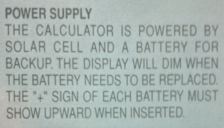

In [86]:
img = Image.open(requests.get('https://www.imgonline.com.ua/examples/text-photographed-eng.jpg', stream=True).raw)
img = img.resize((224, 128))
img.save('sample.png')
img

In [87]:
image = cv2.imread('sample.png')

In [88]:
text = pytesseract.image_to_string(image, config=r'--oem 3 --psm 6 -l eng')
print(text)

POWER SUPPLY

THE CALCULATOR IS POWERED BY
SOLAR CELL AND A BATTERY FOR
BACKUP. THE DISPLAY WILL DIM WHEN
THE BATTERY NEEDS TO BE REPLACED.
THE "+" SIGN OF EACH BATTERY MUST
‘SHOW UPWARD WHEN INSERTED.



In [89]:
data = pytesseract.image_to_data(image, output_type=Output.DICT)

In [92]:
n_boxes = len(data['level'])
n_boxes

47

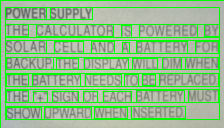

In [93]:
for i in range(n_boxes):
  x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
  img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

Image.fromarray(img)

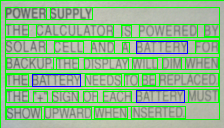

In [96]:
for i in range(n_boxes):
  if data['text'][i] == 'BATTERY':
    x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
    img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 1)
Image.fromarray(img)